#### Brenna Manning and Emily Wang | Change the World : Drug Abuse and Health | Data Science 2016

March 3, 2016

*Previously on... 'drugs_usage_health_intro'*
* Switched to using the Drug Abuse and Mental Health Survey dataset
* Finally made a helper function for barplots to investigate correlations between emotions and # of days substance was consumed in the past 30 days
* So many pandas struggles!

*On this episode:*
* Code cleanup
* More investigations, gathering insights to explore in further depth and worth putting into deliverables

In [3]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import seaborn as sns
import numpy as np
import pprint as pp
from IPython.display import display

/home/brenna/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


#### Load data

[Here's the link to the dataset webpage.](http://www.icpsr.umich.edu/icpsrweb/ICPSR/studies/34933)

In [4]:
df = pd.read_table('data/ICPSR_34933/DS0001/34933-0001-Data.tsv')

### Investigating the trends with drug abuse and mental health

#### Do individuals still engage in drug abuse even after family/friends intervene?
#### Adult Depression features in dataset
#### Adolescent Depression features in dataset
#### Youth Mental Health features in dataset

### Next iterations of these exploratory barplots


#### Design Decision: Bins

Our arbitrary scale, based on how people casually talk about... consuming things.

Things will be on relative frequencies either way.

* Never: 0 Days
* Rarely Consumed: 1-2 Days
* Weekly Consumed: 3-6 Days
* Biweekly: 7-12 Days
* Frequently: 13-19 Days 
* Most Days: 20-26 days
* Daily: 27-30 Days

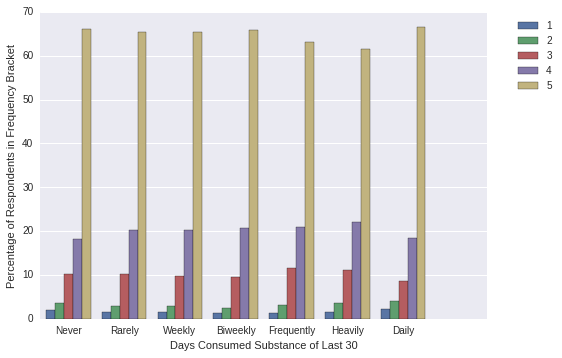

In [35]:
def mental_health_bars30_freq(df, s30, emotion, substancestr, emotionstr):
    """
    let's use relative frequencies and bin up the data based on the design decision described above.
    
    df: dataframe of interest

    s30: subtance of interest
    emotion: mental health aspect of interest

    for the sake of plot labelling:
    substance: human readable string of the substance
    emotionstr: human readable string of the mental health aspect
    """
    
    # convert 91 and 93 to 0 days (easier to understand when looking at plot)
    df.loc[df[s30] == 91, s30] = 0 # never had alcohol
    df.loc[df[s30] == 93, s30] = 0 # haven't had alcohol in the past month
    
    # get rid of the other 90s results
    df_subset = df[df[s30] < 31]
    
    df_subset= df_subset[df_subset[emotion] < 6]
    df_subset['BRACKET'] = df_subset[s30]
    
    df_subset.loc[df_subset[s30] >= 27, 'BRACKET'] = 6 #  27-30 days of drinking per month    
    df_subset.loc[df_subset[s30] < 27, 'BRACKET'] = 5 #  20-27 days of drinking per month
    df_subset.loc[df_subset[s30] < 20, 'BRACKET'] = 4 #  13-19 days of drinking per month
    df_subset.loc[df_subset[s30] < 13, 'BRACKET'] = 3 #  7-12 days of drinking per month
    df_subset.loc[df_subset[s30] < 7, 'BRACKET'] = 2 #  3-6 days of drinking per month
    df_subset.loc[df_subset[s30] < 3, 'BRACKET'] = 1 # 1 or 2 days of drinking per month
    df_subset.loc[df_subset[s30] == 0, 'BRACKET'] = 0 # never had alcohol
        
    grouped = df_subset.groupby('BRACKET')
    bracket_counts = grouped[emotion].value_counts(normalize=True)
    # display(bracket_counts)
        
    bracket_data = [{'BRACKET': br, emotion: em, 'percentage': percentage*100}
                    for (br, em), percentage in dict(bracket_counts).items()
                   ]
    
    plotting_df = pd.DataFrame(bracket_data)
    # display(plotting_df)
    
    p, ax = plt.subplots()
    p = sns.barplot(x="BRACKET", y="percentage", hue=emotion, data=plotting_df, order=[0, 1, 2, 3, 4, 5, 6, 7], hue_order=[1, 2, 3, 4, 5])
    _ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
    ax.set_xticklabels(['Never', 'Rarely', 'Weekly', 'Biweekly', 'Frequently', 'Heavily', 'Daily'])
    plt.xlabel('Days Consumed Substance of Last 30')
    plt.ylabel('Percentage of Respondents in Frequency Bracket')
    
    return


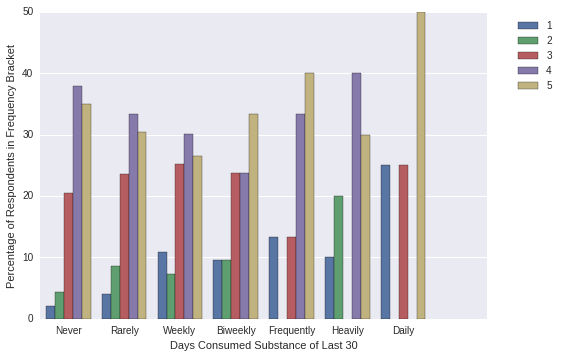

In [38]:
mental_health_bars30_freq(df, "COCUS30A", "DSTNRV30", "Cocaine", "Nervousness")